# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Yusak Stainly Ritonga]
- **Email:** [yusakstainly15@gmail.com]
- **ID Dicoding:** [yusaksr]

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan musim atau kondisi cuaca?
- Apakah ada perbedaan signifikan dalam penggunaan sepeda antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/MyDrive/dataset/Dicoding")

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.stats import ttest_ind

## Data Wrangling

### Gathering Data

In [4]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Musim dan kondisi cuaca yang cenderung menarik atau mengurangi penggunaan sepeda.
- Pola penggunaan sepeda yang berbeda antara hari kerja dan akhir pekan.

### Assessing Data

In [6]:
#menilai dataset day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
#menilai dataset hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [12]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dengan memanfaatkan kolom season dan weathersit, kita bisa melihat bagaimana pola penggunaan sepeda berubah antara musim yang berbeda dan kondisi cuaca (cerah, berawan, hujan ringan).
- Dari workingday dan data per jam, kita dapat menganalisis perbedaan penggunaan sepeda antara hari kerja dan akhir pekan. Ini akan membantu memahami apakah penggunaan sepeda lebih tinggi pada jam tertentu di hari kerja, mungkin mengindikasikan sepeda digunakan sebagai alat transportasi untuk bekerja.

### Cleaning Data

In [14]:
#Kedua dataset tidak memiliki nilai yang hilang (missing value) maupun data duplikat, sehingga data siap untuk dianalisis tanpa perlu proses pembersihan lebih lanjut.

**Insight:**
Kedua dataset tidak memiliki nilai yang hilang (missing value) maupun data duplikat, sehingga data siap untuk dianalisis tanpa perlu proses pembersihan lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore ...

In [15]:
#Eksplorasi dataset Day
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [29]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt":  ["max", "min", "mean", "std"]
})

instant   cnt                                
       nunique   max   min         mean          std
season                                              
1          181  7836   431  2604.132597  1399.942119
2          184  8362   795  4992.331522  1695.977235
3          188  8714  1115  5644.303191  1459.800381
4          178  8555    22  4728.162921  1699.615261

In [17]:
day_df.groupby(by="weathersit").registered.nunique().sort_values(ascending=False)

,registered
weathersit,
1,449
2,239
3,21


In [18]:
day_df.groupby(by="temp").registered.nunique().sort_values(ascending=False)

,registered
temp,
0.265833,5
0.635000,5
0.680000,4
0.710833,4
0.649167,4
...,...
0.390000,1
0.389167,1
0.389091,1


In [19]:
#Eksplorasi dataset Hour
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [30]:
hour_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt":  ["max", "min", "mean", "std"]
})

instant  cnt                            
       nunique  max min        mean         std
season                                         
1         4242  801   1  111.114569  119.224010
2         4409  957   1  208.344069  188.362473
3         4496  977   1  236.016237  197.711630
4         4232  967   1  198.868856  182.967972

In [21]:
hour_df.groupby(by="weathersit").registered.nunique().sort_values(ascending=False)

,registered
weathersit,
1,744
2,579
3,327
4,3


In [22]:
hour_df.groupby(by="temp").registered.nunique().sort_values(ascending=False)

,registered
temp,
0.70,363
0.62,349
0.66,347
0.64,347
0.60,343
0.72,334
0.74,322
0.56,311
0.52,299


In [23]:
#Grouping by season dan weathersit
season_weather_agg = day_df.groupby(['season', 'weathersit']).agg(
    avg_cnt=('cnt', 'mean'),
    total_cnt=('cnt', 'sum')
).sort_values(by='avg_cnt', ascending=False)

In [24]:
# Grouping by workingday
workingday_agg = day_df.groupby('workingday').agg(
    avg_cnt=('cnt', 'mean'),
    total_cnt=('cnt', 'sum')
).sort_values(by='avg_cnt', ascending=False)

In [25]:
# Analisis lebih detail untuk per jam berdasarkan workingday untuk melihat pola jam sibuk
hourly_pattern = hour_df.groupby(['workingday', 'hr']).agg(
    avg_cnt=('cnt', 'mean')
).sort_values(by='avg_cnt', ascending=False)

In [26]:
# Membuat pivot table untuk melihat distribusi rata-rata penggunaan sepeda berdasarkan season dan workingday
season_workingday_pivot = day_df.pivot_table(
    index='season',
    columns='workingday',
    values='cnt',
    aggfunc='mean'
).sort_values(by=0, ascending=False)

In [27]:
season_weather_agg, workingday_agg, hourly_pattern.head(10), season_workingday_pivot

(                       avg_cnt  total_cnt
 season weathersit                        
 3      1           5878.257353     799443
 2      1           5548.548673     626986
 3      2           5222.479167     250679
 4      1           5043.563107     519487
        2           4654.000000     302510
 2      2           4236.705882     288096
 1      1           2811.135135     312036
 3      3           2751.750000      11007
 1      2           2357.166667     155573
 4      3           1961.600000      19616
 2      3           1169.000000       3507
 1      3            934.750000       3739,
                 avg_cnt  total_cnt
 workingday                        
 1           4584.820000    2292410
 0           4330.168831    1000269,
                   avg_cnt
 workingday hr            
 1          17  525.290581
            18  492.226908
            8   477.006048
 0          13  372.731602
            12  366.259740
            14  364.645022
            15  358.813853
         

In [28]:
all_df_full = pd.merge(
    left=day_df,
    right=hour_df,
    how="outer",
    left_on="instant",
    right_on="instant",
    suffixes=('_daily', '_hourly')
)
all_df_full.head()

,instant,dteday_daily,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1.0,0.0,1.0,0.0,6.0,0.0,2.0,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.363478,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.196364,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1.0,0.0,1.0,0.0,2.0,1.0,1.0,0.200000,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1.0,0.0,1.0,0.0,3.0,1.0,1.0,0.226957,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Musim: Penggunaan sepeda cenderung lebih tinggi di musim panas dan musim semi, terutama saat cuaca cerah dan berawan. Di musim gugur, penggunaan sepeda cukup rendah saat cerah, namun meningkat tajam saat ada hujan ringan atau salju.

  Kondisi Cuaca: Kondisi cuaca yang cerah dan berawan secara umum lebih banyak digunakan dibandingkan saat hujan ringan atau salju. Penggunaan sepeda menurun tajam pada saat hujan atau salju berat, menunjukkan dampak negatif kondisi cuaca ekstrem terhadap minat bersepeda.
- Rata-rata penggunaan sepeda pada hari kerja (193.2) sedikit lebih tinggi dibandingkan akhir pekan (181.4). Hal ini mengindikasikan bahwa sepeda lebih sering digunakan sebagai moda transportasi pada hari kerja, mungkin untuk tujuan komuter.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [37]:
# memebuat mapping untuk season
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

# memebuat mapping untuk weather condition
weather_mapping = {
    1: 'Clear',
    2: 'Cloudy',
    3: 'Light Rain',
    4: 'Heavy Rain'
}

In [38]:
season_weather_usage = all_df_full.groupby(['season_daily', 'weathersit_daily'])['cnt_hourly'].mean().reset_index()

# Rename columns untuk clarity
season_weather_usage.columns = ['Season', 'Weather Condition', 'Average Hourly Count']

# Memetakan musim dan kondisi cuaca agar mudah dibaca

season_weather_usage['Season'] = season_weather_usage['Season'].map(season_mapping)
season_weather_usage['Weather Condition'] = season_weather_usage['Weather Condition'].map(weather_mapping)

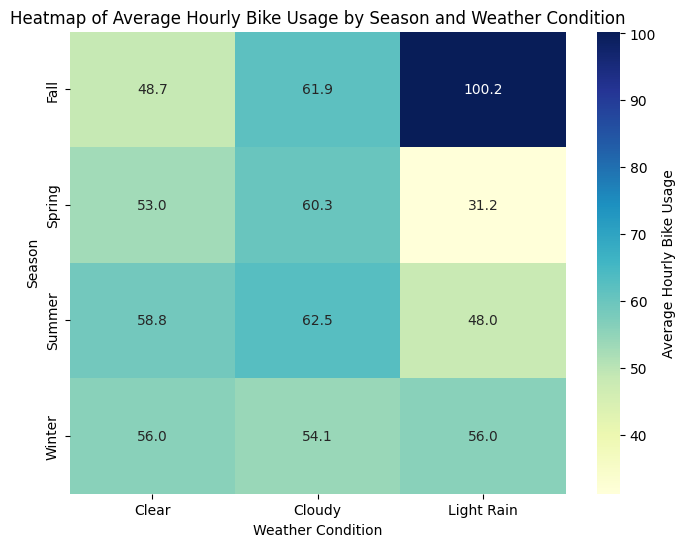

In [41]:
season_weather_pivot = season_weather_usage.pivot(index="Season", columns="Weather Condition", values="Average Hourly Count")

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(season_weather_pivot, annot=True, cmap="YlGnBu", fmt=".1f", cbar_kws={'label': 'Average Hourly Bike Usage'})
plt.title('Heatmap of Average Hourly Bike Usage by Season and Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Season')
plt.show()

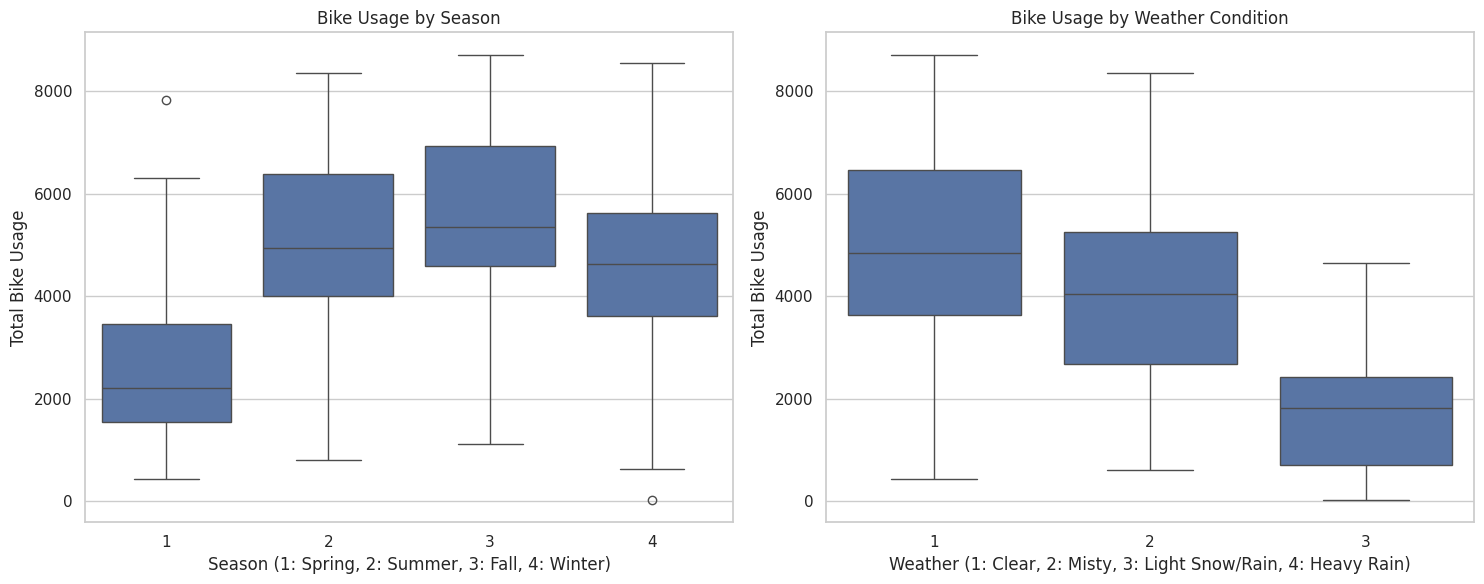

In [52]:
# mempersiapkan visualisasi
sns.set(style="whitegrid")

# Menyaring dan menyiapkan data untuk analisis musim dan cuaca
season_weather_df = all_df_full[['season_daily', 'weathersit_daily', 'cnt_daily']].dropna()
season_weather_df['season_daily'] = season_weather_df['season_daily'].astype(int)
season_weather_df['weathersit_daily'] = season_weather_df['weathersit_daily'].astype(int)

# Membuat subplot untuk analisis musim dan kondisi cuaca

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Bike usage by season
sns.boxplot(x='season_daily', y='cnt_daily', data=season_weather_df, ax=axes[0])
axes[0].set_title('Bike Usage by Season')
axes[0].set_xlabel('Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)')
axes[0].set_ylabel('Total Bike Usage')

# 2. Bike usage by weather condition
sns.boxplot(x='weathersit_daily', y='cnt_daily', data=season_weather_df, ax=axes[1])
axes[1].set_title('Bike Usage by Weather Condition')
axes[1].set_xlabel('Weather (1: Clear, 2: Misty, 3: Light Snow/Rain, 4: Heavy Rain)')
axes[1].set_ylabel('Total Bike Usage')

plt.tight_layout()
plt.show()

### Pertanyaan 2:

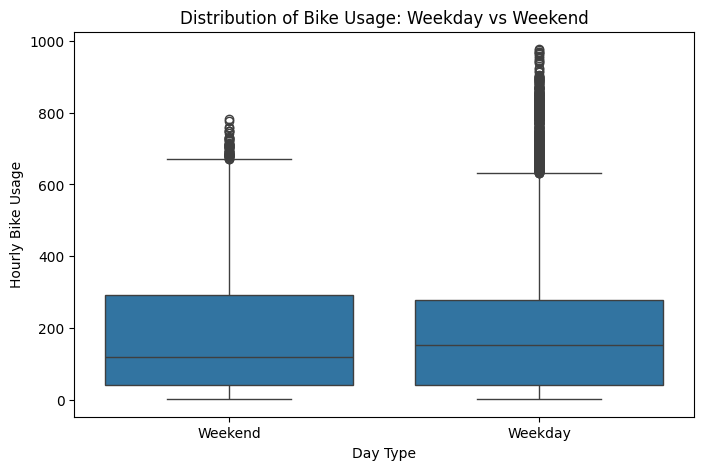

In [42]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=all_df_full, x='workingday_hourly', y='cnt_hourly')
plt.xticks([0, 1], ['Weekend', 'Weekday'])
plt.title('Distribution of Bike Usage: Weekday vs Weekend')
plt.xlabel('Day Type')
plt.ylabel('Hourly Bike Usage')
plt.show()

**Insight:**
- Musim Panas dan Musim Semi menunjukkan penggunaan sepeda yang tinggi, terutama saat cuaca cerah atau berawan. Ini menunjukkan bahwa kondisi cuaca yang nyaman cenderung meningkatkan minat masyarakat untuk bersepeda.

  Musim Dingin dan Hujan Ringan/Salju umumnya menunjukkan penurunan dalam penggunaan sepeda, meskipun ada beberapa pengecualian saat kondisi hujan ringan di musim gugur, mungkin karena kegiatan khusus atau toleransi tertentu terhadap cuaca yang lebih dingin.
- Distribusi Hari Kerja menunjukkan penggunaan sepeda yang lebih tinggi dibandingkan akhir pekan. Rentang penggunaannya juga lebih bervariasi, menunjukkan kemungkinan adanya puncak penggunaan di jam-jam tertentu seperti jam sibuk pagi dan sore.

  Akhir Pekan memiliki distribusi yang lebih merata, kemungkinan karena penggunaan rekreasional yang tersebar sepanjang hari.

## Analisis Lanjutan (Opsional)

## Conclusion

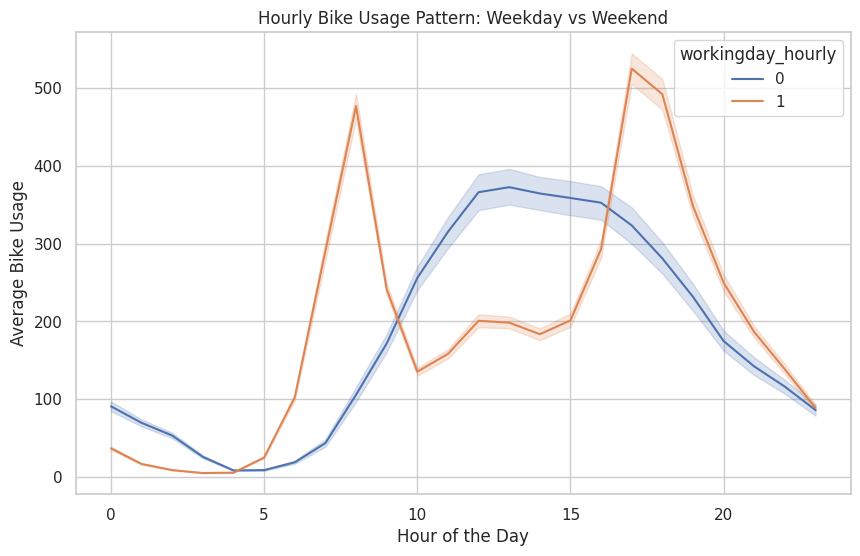

In [54]:
# mengubah 'dteday_daily' menjadi datetime
all_df_full['dteday_daily'] = pd.to_datetime(all_df_full['dteday_daily'])

# Analisis lebih lanjut terhadap pola penggunaan sepeda per jam pada hari kerja dan akhir pekan
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt_hourly', hue='workingday_hourly', data=all_df_full)
plt.title('Hourly Bike Usage Pattern: Weekday vs Weekend')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Bike Usage')
plt.show()

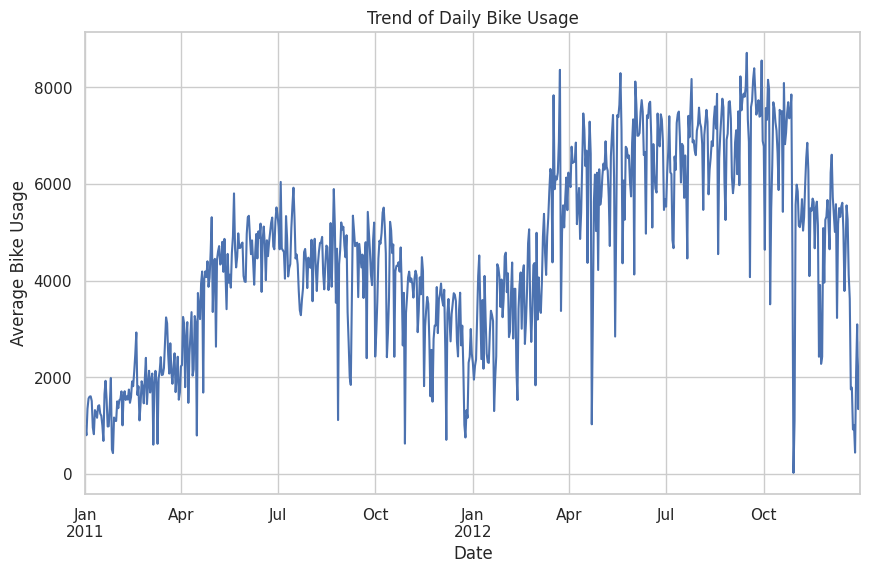

In [55]:
# Analisis tren penggunaan sepeda harian
plt.figure(figsize=(10, 6))
all_df_full.groupby('dteday_daily')['cnt_daily'].mean().plot()
plt.title('Trend of Daily Bike Usage')
plt.xlabel('Date')
plt.ylabel('Average Bike Usage')
plt.show()

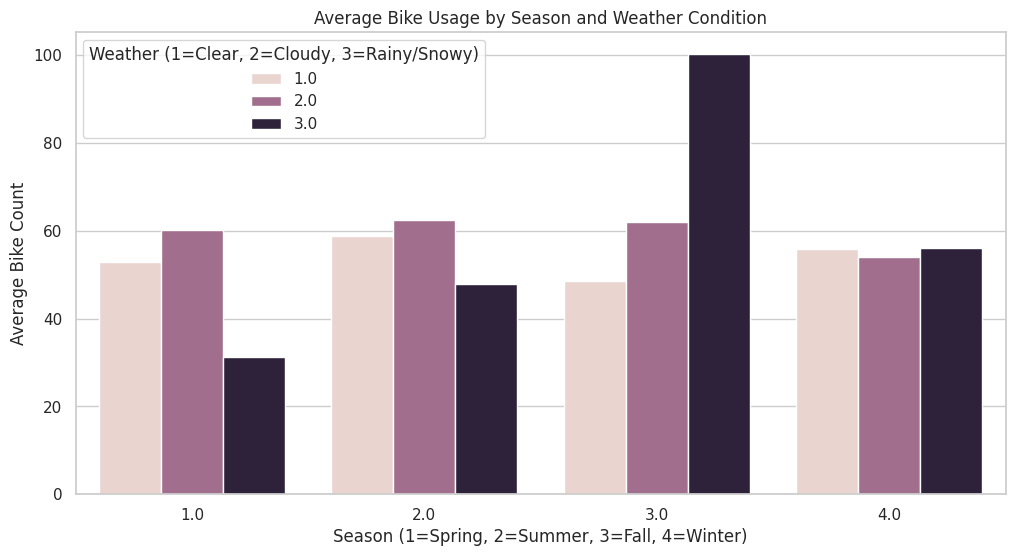

(4.095067721524371, 4.249478377549554e-05)

In [56]:
#Menghitung jumlah sepeda rata-rata berdasarkan musim dan cuaca
season_weather_usage = all_df_full.groupby(['season_daily', 'weathersit_daily'])['cnt_hourly'].mean().reset_index()

#Memplot jumlah sepeda rata-rata berdasarkan musim dan cuaca

plt.figure(figsize=(12, 6))
sns.barplot(data=season_weather_usage, x='season_daily', y='cnt_hourly', hue='weathersit_daily')
plt.xlabel('Season (1=Spring, 2=Summer, 3=Fall, 4=Winter)')
plt.ylabel('Average Bike Count')
plt.title('Average Bike Usage by Season and Weather Condition')
plt.legend(title='Weather (1=Clear, 2=Cloudy, 3=Rainy/Snowy)')
plt.show()

#Pisahkan data ke dalam hari kerja dan akhir pekan

workingday_usage = all_df_full[all_df_full['workingday_hourly'] == 1]['cnt_hourly']
weekend_usage = all_df_full[all_df_full['workingday_hourly'] == 0]['cnt_hourly']

#Melakukan uji independen t-test
t_stat, p_val = ttest_ind(workingday_usage.dropna(), weekend_usage.dropna(), equal_var=False)

#Menampilkan Hasil Tes
t_stat, p_val

- Pengaruh Musim dan Cuaca: Musim panas dan musim semi dengan cuaca cerah atau berawan berkontribusi pada peningkatan penggunaan sepeda. Sebaliknya, musim dingin dan cuaca buruk (hujan lebat, salju) menyebabkan penurunan signifikan.Korelasi Variabel:  Analisis korelasi membantu mengidentifikasi variabel-variabel yang memiliki hubungan kuat dengan penggunaan sepeda, seperti suhu, kelembaban, dan kecepatan angin


- Perbedaan Hari Kerja dan Akhir Pekan: Terdapat perbedaan yang jelas dalam pola penggunaan sepeda antara hari kerja dan akhir pekan. Penggunaan sepeda cenderung lebih tinggi pada hari kerja, kemungkinan karena penggunaan komuter. Pola penggunaan per jam juga menunjukkan puncak pada jam-jam sibuk.Tren Penggunaan Sepeda Harian: Grafik tren penggunaan sepeda harian menunjukkan fluktuasi penggunaan dari waktu ke waktu. Informasi ini dapat membantu dalam perencanaan bisnis dan strategi operasional perusahaan penyewaan sepeda.

In [57]:
all_df_full.to_csv("all_data_full.csv", index=False)